<a href="https://colab.research.google.com/github/shwets1503/Sales_Prediction/blob/master/Overall_data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

#Plotly LibrariEs
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
# Minmax scaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', 100)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


## Orders

In [16]:
orders_df = pd.read_csv('../content/drive/My Drive/sales_data2/olist_orders_dataset.csv', engine='python')
order_items = pd.read_csv('../content/drive/My Drive/sales_data2/olist_order_items_dataset.csv', engine='python')

In [17]:
customer = pd.read_csv('../content/drive/My Drive/sales_data/customers_dataset.csv', engine='python', dtype={'customer_zip_code_prefix': str})
sellers = pd.read_csv('../content/drive/My Drive/sales_data3/olist_sellers_dataset.csv', engine='python')
order_reviews = pd.read_csv('../content/drive/My Drive/sales_data2/olist_order_reviews_dataset.csv', engine='python')

In [18]:
unique_ = order_items['order_id'].nunique()
print("DataFrame shape: {}; unique order ids: {}".format(order_items.shape, unique_))

DataFrame shape: (112650, 7); unique order ids: 98666


In [19]:
items_reviews = pd.merge(order_reviews, order_items, how='left', on='order_id')

In [20]:
review_qty = items_reviews.groupby('review_score').size()
review_value = items_reviews.groupby('review_score')['price'].mean()

In [21]:
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
trace0 = go.Bar(
    x=review_qty.index,
    y=review_qty.values,
    name='Number of orders',
    marker=dict(color='rgb(49,130,189)')
)
trace1 = go.Bar(
    x=review_value.index,
    y=review_value.values,
    name='Produt mean value',
    marker=dict(color='rgb(204,204,204)')
)
fig = make_subplots(rows=1, cols=2, print_grid=False)
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)

fig['layout'].update(height=400, width=800, title='Review Score')
fig['layout']['xaxis1'].update(title='review score', domain=[0, 0.40])
fig['layout']['xaxis2'].update(title='review score', domain=[0.6, 1])
iplot(fig);

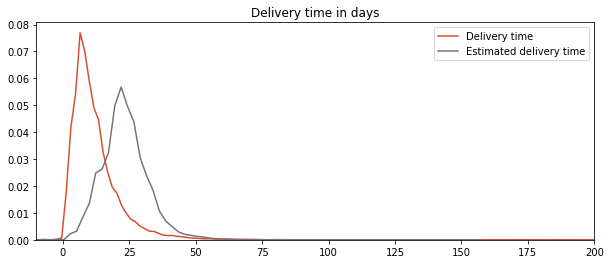

In [22]:
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['order_approved_at'] = pd.to_datetime(orders_df['order_approved_at'])
orders_df['order_estimated_delivery_date'] = pd.to_datetime(orders_df['order_estimated_delivery_date'])
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])
# Calculate differences in hours
orders_df['delivery_time'] = (orders_df['order_delivered_customer_date'] - orders_df['order_approved_at']).dt.total_seconds() / 86400
orders_df['estimated_delivery_time'] = (orders_df['order_estimated_delivery_date'] - orders_df['order_approved_at']).dt.total_seconds() / 86400
# Delivery estimated time and actual delivery time
plt.figure(figsize=(10,4))
plt.title("Delivery time in days")
plt.xlim(-10, 200)

ax1 = sns.kdeplot(orders_df['delivery_time'].dropna(), color="#D84E30", label='Delivery time')
ax2 = sns.kdeplot(orders_df['estimated_delivery_time'].dropna(), color="#7E7270", label='Estimated delivery time')

In [23]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [24]:
closed_deals = pd.read_csv('../content/drive/My Drive/sales_data/closed_deals_dataset.csv', engine='python')
qualified_leads = pd.read_csv('../content/drive/My Drive/sales_data/olist_marketing_qualified_leads_dataset.csv', engine='python')
geo = pd.read_csv('../content/drive/My Drive/sales_data/olist_geolocation_dataset.csv', engine='python',dtype={'geolocation_zip_code_prefix': str})

In [25]:
geo.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,01037,-23.545621,-46.639292,sao paulo,SP
1,01046,-23.546081,-46.644820,sao paulo,SP
2,01046,-23.546129,-46.642951,sao paulo,SP
3,01041,-23.544392,-46.639499,sao paulo,SP
4,01035,-23.541578,-46.641607,sao paulo,SP


In [26]:
products = pd.read_csv('../content/drive/My Drive/sales_data3/olist_products_dataset.csv', engine='python')
product_category = pd.read_csv('../content/drive/My Drive/sales_data3/product_category_name_translation.csv', engine='python')
payments = pd.read_csv('../content/drive/My Drive/sales_data2/olist_order_payments_dataset.csv', engine='python')

In [27]:
products.shape

(32951, 9)

In [28]:
products.product_category_name.value_counts()

cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: product_category_name, Length: 73, dtype: int64

In [29]:
categories = pd.merge(products, product_category,how ='left', left_on ='product_category_name', right_index = True, suffixes=(None, '_eng'))

In [30]:
categories.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_eng
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [31]:
cat = categories['product_category_name_eng'].value_counts().reset_index().rename(columns={'index':'category','product_category_name_eng':'count'})

In [32]:
fig = go.Figure(go.Bar(y=cat['category'], x=cat['count'], # Need to revert x and y axis
                      orientation="h", text=cat['count'],
    textposition = "outside", marker={'color': cat['count'], 
    'colorscale': 'oryel'})) 
fig.update_layout(title_text='Customer count of each state',
                  xaxis_title="count",yaxis_title="State", 
                  width=1000, height=1000, yaxis={'categoryorder':'total ascending'})
fig.show()

In [33]:
order_reviews.shape

(100000, 7)

In [34]:
len(order_reviews)-order_reviews['review_comment_message'].isnull().sum()

41753

In [35]:
orders = orders_df['order_status'].value_counts().reset_index().rename(columns={'index':'status','order_status':'count'})

In [36]:
orders.head()

,status,count
0,delivered,96478
1,shipped,1107
2,canceled,625
3,unavailable,609
4,invoiced,314


In [37]:
fig = go.Figure(go.Bar(
    x=orders['status'],y=orders['count'],
    marker={'color': orders['count'], 
    'colorscale': 'Viridis'},  
    text=orders['count'],
    textposition = "outside",
))
fig.update_layout(title_text='Counts of order status',xaxis_title="Status",yaxis_title="Count", width=800, height=500,)
fig.show()

In [38]:
# Changing the data type for date columns
timestamp_cols = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 
                  'order_estimated_delivery_date']
for col in timestamp_cols:
    orders_df[col] = pd.to_datetime(orders_df[col])

In [39]:
# Extracting attributes for purchase date - Day and Day of Week
orders_df['order_purchase_dayofweek_name'] = orders_df['order_purchase_timestamp'].apply(lambda x: x.strftime('%a'))

In [40]:
order = orders_df['order_purchase_dayofweek_name'].value_counts().reset_index().rename(columns={'index':'weekday','order_purchase_dayofweek_name':'count'})

In [41]:
fig = go.Figure(go.Bar(
    x=order['weekday'],y=order['count'],
    marker={'color': order['count'], 
    'colorscale': 'Bluered'}
))
fig.update_layout(title_text='Orders by weekday',xaxis_title="Week day",yaxis_title="Count", width=800, height=500,)
fig.show()

In [42]:
# Extracting attributes for purchase date - Hour and Time of the Day
orders_df['order_purchase_hour'] = orders_df['order_purchase_timestamp'].apply(lambda x: x.hour)
hours_bins = [-0.1, 6, 12, 18, 23]
hours_labels = ['Dawn', 'Morning', 'Afternoon', 'Night']
orders_df['order_purchase_time_day'] = pd.cut(orders_df['order_purchase_hour'], hours_bins, labels=hours_labels)

In [43]:
order = orders_df['order_purchase_time_day'].value_counts().reset_index().rename(columns={'index':'time_of_day','order_purchase_time_day':'count'})

In [44]:
fig = go.Figure(go.Bar(
    x=order['time_of_day'],y=order['count'],
    marker={'color': order['count'], 
    'colorscale': 'tropic'}
))
fig.update_layout(title_text='Orders by weekday',xaxis_title="Week day",yaxis_title="Count", width=800, height=500,)
fig.show()

In [45]:
orders_df['order_purchase_year'] = orders_df['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y'))

In [46]:
purchase_2017 = orders_df[orders_df['order_purchase_year']=='2017'].groupby('order_purchase_year').sum().rename(columns={'order_purchase_hour':'count'})

In [47]:
purchase_2018 = orders_df[orders_df['order_purchase_year']=='2018'].groupby('order_purchase_year').sum().rename(columns={'order_purchase_hour':'count'})

In [48]:
fig = go.Figure(go.Indicator(
    mode = "number+delta",
    value = purchase_2018['count']['2018'],
    delta = {'reference': purchase_2017['count']['2017']},
    domain = {'row': 1, 'column': 1},
  title = {'text': "Increase in number of orders from 2018(Black) to 2017(Green)"}
))
fig.update_layout(width=800, height=500)
fig.show()

In [49]:
order = customer['customer_state'].value_counts().reset_index().rename(columns={'index':'state','customer_state':'count'})

In [50]:
fig = go.Figure(go.Bar(y=order['state'], x=order['count'], # Need to revert x and y axis
                      orientation="h", text=order['count'],
    textposition = "outside", marker={'color': order['count'], 
    'colorscale': 'bluyl'})) 
fig.update_layout(title_text='Customer count of each state',
                  xaxis_title="count",yaxis_title="State", 
                  width=1000, height=700, yaxis={'categoryorder':'total ascending'})
fig.show()

In [51]:
order = customer['customer_city'].value_counts().reset_index().rename(columns={'index':'state','customer_city':'count'}).head(10)

In [52]:
fig = go.Figure(go.Bar(y=order['state'], x=order['count'], # Need to revert x and y axis
                      orientation="h", text=order['count'],
    textposition = "inside", marker={'color': order['count'], 
    'colorscale': 'sunsetdark'})) 
fig.update_layout(title_text='Customer count of each state',
                  xaxis_title="count",yaxis_title="State", 
                  width=800, height=800, yaxis={'categoryorder':'total ascending'})
fig.show()

In [53]:
orders_df['order_purchase_year_month'] = orders_df['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y%m'))
orders_df['order_purchase_year'] = orders_df['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y'))

# Merging orders and order_items
df_orders_items = orders_df.merge(order_items, how='left', on='order_id')
df_orders_items = df_orders_items.merge(customer, how='left', on='customer_id')
df_orders_items_geo = df_orders_items.merge(geo, how='left', left_on='customer_zip_code_prefix', 
                                        right_on='geolocation_zip_code_prefix')

In [54]:
value_sum = df_orders_items_geo.groupby('customer_state', as_index = False)['freight_value'].count()
value_mean = df_orders_items_geo.groupby('customer_state', as_index = False)['freight_value'].mean()

fig = go.Figure(go.Bar(y=value_sum['customer_state'], x=value_sum['freight_value'],
                      orientation="h", text=value_sum['freight_value'],
    textposition = "auto", marker={'color': value_sum['freight_value'], 
    'colorscale': 'deep'})) 

fig.update_layout(title_text='Sum of freight value by customer state',
                  xaxis_title="freight_value",yaxis_title="State", 
                  width=600, height=600, yaxis={'categoryorder':'total descending'})

fig.show()

In [55]:
fig = go.Figure(go.Bar(y=value_mean['customer_state'], x=value_mean['freight_value'],
                      orientation="h", text=value_mean['freight_value'],
    textposition = "auto", marker={'color': value_mean['freight_value'], 
    'colorscale': 'earth'}))



fig.update_layout(title_text='Mean of freight value by customer state',
                  xaxis_title="freight_value",yaxis_title="State", 
                  width=600, height=600, yaxis={'categoryorder':'total descending'})
fig.show()

In [56]:
price_sum = df_orders_items_geo.groupby('customer_state', as_index = False)['price'].count()

In [57]:
price_mean = df_orders_items_geo.groupby('customer_state', as_index = False)['price'].mean()

In [58]:
fig = go.Figure(go.Bar(y=price_sum['customer_state'], x=price_sum['price'], # Need to revert x and y axis
                      orientation="h", text=price_sum['price'],
    textposition = "auto", marker={'color': price_sum['price'], 
    'colorscale': 'bluyl'})) 
fig.update_layout(title_text='Mean of price by customer state',
                  xaxis_title="price",yaxis_title="State", 
                  width=600, height=600, yaxis={'categoryorder':'total descending'})
fig.show()

In [59]:
fig = go.Figure(go.Bar(y=price_mean['customer_state'], x=price_mean['price'].astype('int'), # Need to revert x and y axis
                      orientation="h", text=price_mean['price'].astype('int'),
    textposition = "auto", marker={'color': price_mean['price'].astype('int'), 
    'colorscale': 'sunsetdark'})) 
fig.update_layout(title_text='Mean of price by customer state',
                  xaxis_title="price",yaxis_title="State", 
                  width=600, height=600, yaxis={'categoryorder':'total descending'})
fig.show()

In [60]:
# Filtering data between 201701 and 201808
df_orders_filt = df_orders_items[(df_orders_items['order_purchase_year_month'].astype(int) >= 201701)]
df_orders_filt = df_orders_filt[(df_orders_filt['order_purchase_year_month'].astype(int) <= 201808)]

# Grouping data
df_month_aggreg = df_orders_filt.groupby(by=['order_purchase_year', 'order_purchase_year_month'], as_index=False)
df_month_aggreg = df_month_aggreg.agg({
    'order_id': 'count',
    'price': 'sum',
    'freight_value': 'sum'
})

# Adding new columns for analysis
df_month_aggreg['price_per_order'] = df_month_aggreg['price'] / df_month_aggreg['order_id']
df_month_aggreg['freight_per_order'] = df_month_aggreg['freight_value'] / df_month_aggreg['order_id']
df_month_aggreg.head()

,order_purchase_year,order_purchase_year_month,order_id,price,freight_value,price_per_order,freight_per_order
0,2017,201701,966,120312.87,16875.62,124.547484,17.469586
1,2017,201702,1998,247303.02,38977.60,123.775285,19.508308
2,2017,201703,3041,374344.30,57704.29,123.099079,18.975432
3,2017,201704,2697,359927.23,52495.01,133.454664,19.464223
4,2017,201705,4176,506071.14,80119.81,121.185618,19.185778


In [61]:
#defining visualizaition functions
def format_spines(ax, right_border=True):
    
    ax.spines['bottom'].set_color('#666666')
    ax.spines['left'].set_color('#666666')
    ax.spines['top'].set_visible(False)
    if right_border:
        ax.spines['right'].set_color('#FFFFFF')
    else:
        ax.spines['right'].set_color('#FFFFFF')
    ax.patch.set_facecolor('#FFFFFF')
    

def single_countplot(df, ax, x=None, y=None, order=True, hue=False, palette='plasma', width=0.75, sub_width=0.3,
                     sub_size=12):
    """
    Parâmetros
    ----------
    classifiers: conjunto de classificadores em forma de dicionário [dict]
    X: array com os dados a serem utilizados no treinamento [np.array]
    y: array com o vetor target do modelo [np.array]

    Retorno
    -------
    None
    """

    # Verificando plotagem por quebra de alguma variável categórica
    ncount = len(df)
    if x:
        col = x
    else:
        col = y
    if hue != False:
        if order:
            sns.countplot(x=x, y=y, data=df, palette=palette, ax=ax, order=df[col].value_counts().index, hue=hue)
        else:
            sns.countplot(x=x, y=y, data=df, palette=palette, ax=ax, hue=hue)
    else:
        if order:
            sns.countplot(x=x, y=y, data=df, palette=palette, ax=ax, order=df[col].value_counts().index)
        else:
            sns.countplot(x=x, y=y, data=df, palette=palette, ax=ax)

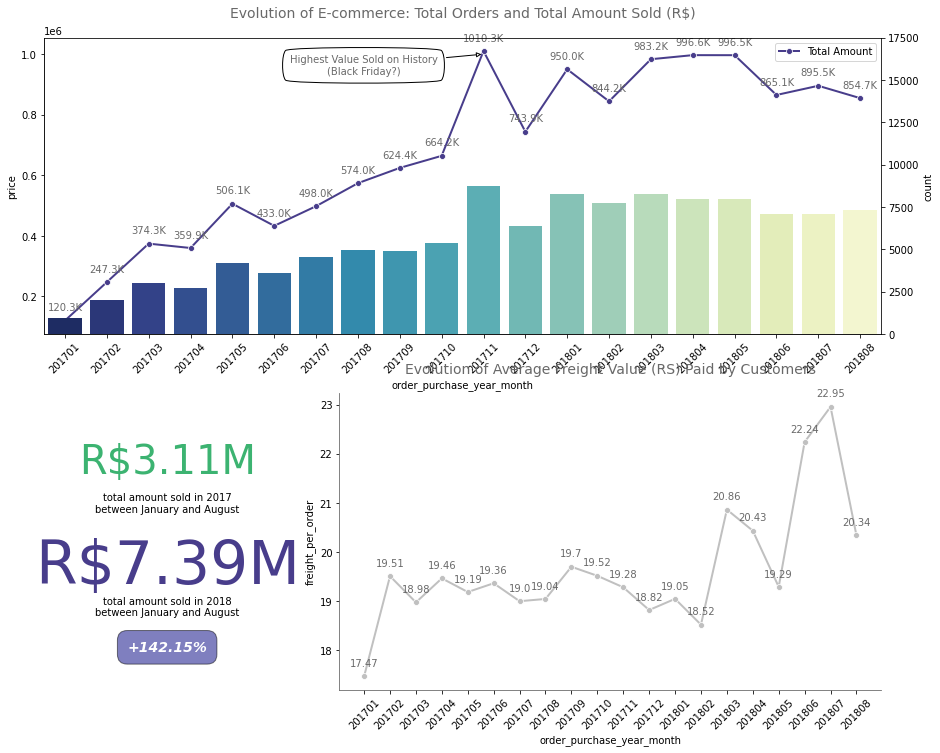

In [62]:
# Creating figure
fig = plt.figure(constrained_layout=False, figsize=(15, 12))

# Axis definition
gs = GridSpec(2, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1:])

# Plot 1 - Evolution of total orders and total sales on e-commerce
sns.lineplot(x='order_purchase_year_month', y='price', ax=ax1, data=df_month_aggreg, linewidth=2, 
             color='darkslateblue', marker='o', label='Total Amount')
ax1_twx = ax1.twinx()
single_countplot(df_orders_filt, x='order_purchase_year_month', ax=ax1_twx, order=False, palette='YlGnBu_r')
ax1_twx.set_yticks(np.arange(0, 20000, 2500))

# Customizing the first plot
format_spines(ax1)
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
for x, y in df_month_aggreg.price.items():
    ax1.annotate(str(round(y/1000, 1))+'K', xy=(x, y), textcoords='offset points', xytext=(0, 10),
                ha='center', color='dimgrey')
ax1.annotate(f'Highest Value Sold on History\n(Black Friday?)', (10, 1000000), xytext=(-120, -20), 
             textcoords='offset points', bbox=dict(boxstyle="round4", fc="w", pad=.8),
             arrowprops=dict(arrowstyle='-|>', fc='w'), color='dimgrey', ha='center')
ax1.set_title('Evolution of E-commerce: Total Orders and Total Amount Sold (R$)', size=14, color='dimgrey', pad=20)

# Plot 2 - Big Numbers of Sales Evolution
month_comparison = ['201701', '201702', '201703', '201704', '201705', '201706', '201707', '201708',
                    '201801', '201802', '201803', '201804', '201805', '201806', '201807', '201808']
df_sales_compare = df_month_aggreg.query('order_purchase_year_month in (@month_comparison)')
sold_2017 = df_sales_compare[df_sales_compare['order_purchase_year']=='2017']['price'].sum()
sold_2018 = df_sales_compare[df_sales_compare['order_purchase_year']=='2018']['price'].sum()
growth = 1 + (sold_2017 / sold_2018)
ax2.text(0.50, 0.73, 'R$' + str(round(sold_2017/1000000, 2)) + 'M', fontsize=40, color='mediumseagreen', ha='center')
ax2.text(0.50, 0.60, 'total amount sold in 2017\nbetween January and August', fontsize=10, ha='center')
ax2.text(0.50, 0.36, 'R$' + str(round(sold_2018/1000000, 2)) + 'M', fontsize=60, color='darkslateblue', ha='center')
ax2.text(0.50, 0.25, 'total amount sold in 2018\nbetween January and August', fontsize=10, ha='center')
signal = '+' if growth > 0 else '-'
ax2.text(0.50, 0.13, f'{signal}{str(round(100 * growth, 2))}%', fontsize=14, ha='center', color='white', style='italic', weight='bold',
         bbox=dict(facecolor='navy', alpha=0.5, pad=10, boxstyle='round, pad=.7'))
ax2.axis('off')

# Plot 3 - Evolution of mean freight value paid by the customers
sns.lineplot(x='order_purchase_year_month', y='freight_per_order', data=df_month_aggreg, linewidth=2, 
             color='silver', marker='o', ax=ax3)
format_spines(ax3, right_border=False)
for tick in ax3.get_xticklabels():
    tick.set_rotation(45)
for x, y in df_month_aggreg.freight_per_order.items():
  ax3.annotate(round(y, 2), xy=(x, y), textcoords='offset points', xytext=(0, 10),
                ha='center', color='dimgrey')
ax3.set_title('Evolution of Average Freight Value (RS) Paid by Customers', size=14, color='dimgrey', pad=20)

plt.show()

In [63]:
def add_series_working_days(series_name, df, date_col1, date_col2):
    """
    This function is used for calculating working days between two dates
    as an additional column on a DataFrame
    
    Input:
        series_names: name of the new series created with working days calculated
        df: DataFrame object with the dates
        date_col1: date column 1
        date_col2: date column 2
        
    Returns:
        df_return: DataFrame with working days columns
    """
    # Creating a list with the difference between dates
    time_list = []
    idx = 0
    second_date_series = df[date_col2].values.astype('datetime64[D]')
    for date in df[date_col1].values.astype('datetime64[D]'):
        second_date = second_date_series[idx]
        try:
            workdays = np.busday_count(date, second_date)
        except:
            workdays = np.NaN
        time_list.append(workdays)
        idx += 1
    
    # Adding column in a DataFrame object
    df_return = df.copy()
    df_return[series_name] = pd.Series(time_list)
    df_return.dropna(inplace=True)
    
    return df_return

def communicate_params(freight, deliv, est):
    """
    Additional function create for helping on graphical exploration (state dashboard)
    
    Input:
        freight: freight value to be plotted as a text
        deliv: delivery time to be plotted as a text
        estimative: differente between delivery time and estimative time to be plotted as a text
    
    Returns:
        None
    """  
    # Comunicando o frete
    axs[0, 0].text(0.10, 0.30, f'R${freight:.2f}', fontsize=45)
    axs[0, 0].text(0.07, 0.12, 'is the mean value of freight paid', fontsize=12)
    axs[0, 0].text(0.25, 0.00, 'for online shopping', fontsize=12)
    axs[0, 0].axis('off')

    # Comunicando tempo médio de entrega
    axs[0, 1].text(0.13, 0.30, f'{deliv:.2f}', fontsize=45)
    axs[0, 1].text(0.52, 0.30, 'working days', fontsize=12)
    axs[0, 1].text(0.07, 0.12, 'is the average delay for delivery', fontsize=12)
    axs[0, 1].text(0.23, 0.00, 'for online shopping', fontsize=12)
    axs[0, 1].axis('off')

    # Comunicando diferença entre tempo de entrega e tempo estimado
    axs[0, 2].text(0.18, 0.30, f'{est:.2f}', fontsize=45)
    axs[0, 2].text(0.58, 0.30, 'working days', fontsize=12)
    axs[0, 2].text(0.07, 0.12, 'is the difference between estimated', fontsize=12)
    axs[0, 2].text(0.23, 0.00, 'date and delivery date', fontsize=12)
    axs[0, 2].axis('off') 
    
def plot_param(df, col, title, xlim, n_row, n_col, y='customer_state', div_xlim=0, 
               one_axis=False, xlabel=[], ylabel='State'):
    """
    This function is used for plotting a comparative study on 5 better and 5 worst according to the topic
    
    Input:
        df: DataFrame object with the data
        col: column to be studied
        title: title
        xlim: xlim
        n_row: line index where the graph will be plotted
        n_col: column index where the graph will be plotted
    """
    # Axis definition
    if one_axis:
        ax_top = axs[n_col]
        ax_last = axs[n_col+1]
    else:
        ax_top = axs[n_row, n_col]
        ax_last = axs[n_row+1, n_col]
    
    # First step: Top 5
    df.sort_values(by=col, ascending=False, inplace=True)
    top5 = df.iloc[:5, :]
    sns.barplot(x=col, y=y, data=top5, ci=None, palette='Blues_d', ax=ax_top)
    format_spines(ax_top, right_border=False)
    ax_top.set_title(title)
    ax_top.set_xlim(0, xlim)
    ax_top.set_xlabel(xlabel)
    if n_col > 0:
        ax_top.set_ylabel('')
    else:
        ax_top.set_ylabel(ylabel)
    
    # Second step: Last 5
    last5 = df.iloc[-5:, :]
    sns.barplot(x=col, y=y, data=last5, ci=None, palette='Blues_d', ax=ax_last)
    format_spines(ax_last, right_border=False)
    ax_last.set_title(title.replace('Highest', 'Lowest'))
    if div_xlim > 0:
        ax_last.set_xlim(0, xlim/div_xlim)
    else:
        ax_last.set_xlim(0, xlim)
    ax_last.set_xlabel(xlabel)
    if n_col > 0:
        ax_last.set_ylabel('')
    else:
        ax_last.set_ylabel(ylabel)

In [64]:
# Delivery working days
df_orders_plot = df_orders_filt.copy()
time_cols = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date',
           'order_delivered_customer_date', 'order_estimated_delivery_date']
for col in time_cols:
    df_orders_plot[col] = pd.to_datetime(df_orders_plot[col])
df_delivery_time = add_series_working_days(series_name='time_to_delivery', 
                                           df=df_orders_plot,
                                           date_col1 = 'order_purchase_timestamp', 
                                           date_col2 = 'order_delivered_customer_date')


In [65]:
# Grouping by delivery time and state
df_delivery_time = df_delivery_time.groupby(['customer_state'], as_index=False).mean()
df_delivery_time = df_delivery_time.iloc[:, np.c_[(0, -1)][0]]

# Working days between delivery time and estimated time
df_diff_est_deliv = add_series_working_days(series_name='diff_est_deliv', 
                                           df=df_orders_plot,
                                           date_col1 = 'order_delivered_customer_date', 
                                           date_col2 = 'order_estimated_delivery_date')


In [66]:
# Grouping by state 
df_diff_est_deliv = df_diff_est_deliv.groupby(['customer_state'], as_index=False).mean()
df_diff_est_deliv = df_diff_est_deliv.iloc[:, np.c_[(0, -1)][0]]
df_diff_est_deliv['diff_est_deliv'] = df_diff_est_deliv['diff_est_deliv'].astype(int)

In [67]:
# Calculating parameters
df_mean_freight = df_orders_plot.groupby(['customer_state'], 
                                as_index=False).mean().loc[:, ['customer_state', 'freight_value']]
mean_freight_value = df_mean_freight['freight_value'].mean()
mean_delivery_time = df_delivery_time['time_to_delivery'].mean()
mean_diff_estimative = df_diff_est_deliv['diff_est_deliv'].mean()

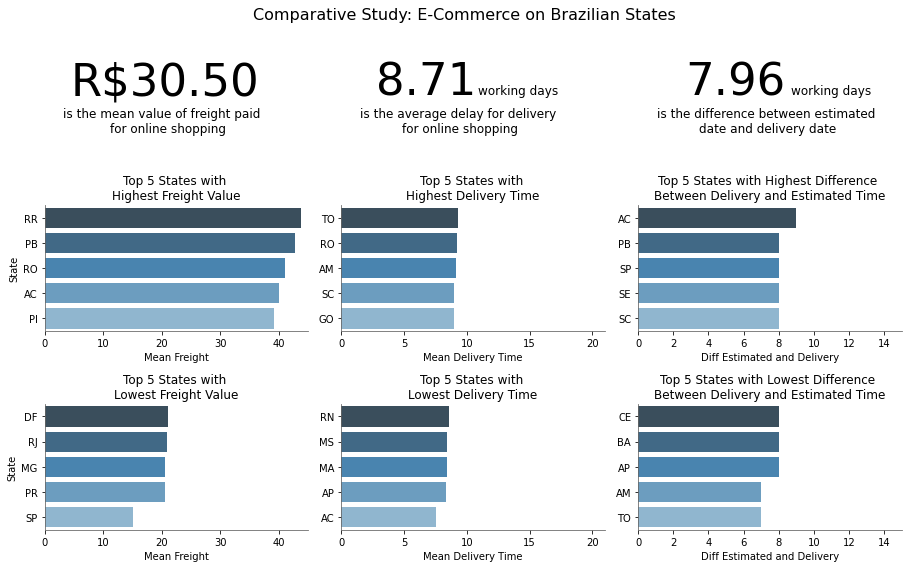

In [68]:
# Plotting
fig, axs = plt.subplots(3, 3, figsize=(13, 8))
communicate_params(mean_freight_value, mean_delivery_time, mean_diff_estimative)

# Reight information
plot_param(df=df_mean_freight, col='freight_value', 
           title='Top 5 States with \nHighest Freight Value', xlim=45, n_row=1, n_col=0, xlabel='Mean Freight')

# Delivery time information
plot_param(df=df_delivery_time, col='time_to_delivery', 
           title='Top 5 States with \nHighest Delivery Time', xlim=21, n_row=1, n_col=1, 
           xlabel='Mean Delivery Time')

# Difference between estimative delivery and real delivery time
plot_param(df=df_diff_est_deliv, col='diff_est_deliv', 
           title='Top 5 States with Highest Difference \nBetween Delivery and Estimated Time', 
           xlim=15, n_row=1, n_col=2, xlabel='Diff Estimated and Delivery')

plt.suptitle('Comparative Study: E-Commerce on Brazilian States', size=16)
plt.tight_layout()
plt.show()

In [69]:
card = payments['payment_type'].value_counts(normalize=True).to_frame().reset_index().rename(columns={'index':'Card_type','payment_type':'count'})
card['count'] = round(card['count']*100,2)

In [70]:
payments['payment_type'].count()

103886

In [71]:
fig = go.Figure([go.Pie(labels=card['Card_type'], values=card['count']
                        ,hole=0.7)])  # can change the size of hole 

fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=15)
fig.update_layout(title="Percentage of transactions by payment type (103886 total payments)",title_x=0.5, width=800, height=500)
fig.show()

In [72]:
install = payments['payment_installments'].value_counts().to_frame().reset_index().rename(columns={'index':'num','payment_installments':'Count'})

In [73]:
fig = go.Figure(go.Bar(
    x=install['num'],y=install['Count'],
    marker={'color': install['Count'], 
    'colorscale': 'Viridis'},  
    text=install['Count'],
    textposition = "outside"
))
fig.update_layout(title_text='Distribution of payment installments',xaxis_title="count",yaxis_title="Payment Installments", xaxis = dict(
        tickmode = 'linear'
    ))
fig.show()